In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

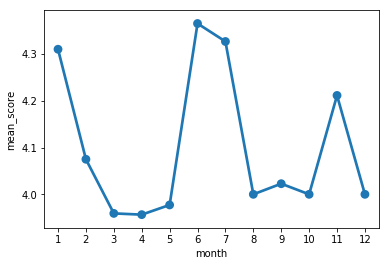

In [2]:
reviews = pd.read_html('mon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews[reviews['year']==2017]
mean_stars = reviews.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='month', y='mean_score', data=mean_stars)

Text(0.5,1,'Weekly review trend')

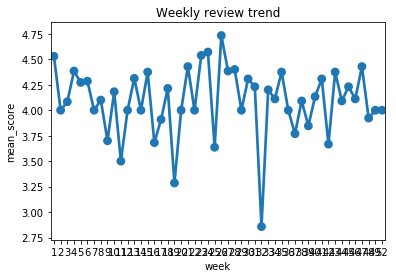

In [28]:
#list(reviews['user_id'])
# week  = reviews['date'].dt.week
# week.min()
reviews['date'] = pd.to_datetime(reviews['date'])
# reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews['week']  = reviews['date'].dt.week
reviews = reviews[reviews['year']==2017]
mean_stars = reviews.groupby(['year','week'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='week', y='mean_score', data=mean_stars)
ax.set_title("Weekly review trend")

In [4]:
#  reviews = pd.read_html('gordon_reviews.html', header=0)[0]
#  stars = reviews[['date', 'stars']].sort_values(by=['date'])
#  stars['date'] = pd.to_datetime(stars['date'])
#  stars['year'], stars['month'] = stars['date'].dt.year, stars['date'].dt.month
#  stars = stars[stars['year']>=2015]
#  mean_stars = stars.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
#  ax = sns.pointplot(x='month', y='mean_score', hue='year', data=mean_stars)

In [38]:
low_reviews = reviews[(reviews['year']==2017)]# & (reviews['month'].isin([3,4,5]))]
print(low_reviews['useful'].mean())
print(low_reviews['useful'].min())
print(low_reviews['useful'].max())

0.8272884283246977
0
32


In [6]:
# list(low_reviews['user_id'])

In [7]:
mon_users = pd.read_csv('mon_users.csv')
mon_users.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,--8ELb8W1afbyP21EZStPg,Mi Sou,20,2011-10-25 00:00:00,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,-0tLDaIzN1Gbxc51Bxad4A,Rana,33,2013-05-14 00:00:00,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,-9ZFoRZpBAsf1ckY3aeyrg,Alexandra,91,2013-01-14 00:00:00,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,-9_Nz6wJ9Rj0q7kq6YJ-MA,Olga,125,2013-05-26 00:00:00,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,-AkgXdzDcdEvyXgKYJQW4w,Karli,322,2013-01-09 00:00:00,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [8]:
users = mon_users.drop(['id', 'name', 'yelping_since'], axis=1)
# users = mon_users.drop(['id', 'name'], axis=1)
users.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,20,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,33,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,91,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,125,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,322,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


# Clustering
## Kmeans

cluster users using Kmeans and see if potential influencers lie in different cluster

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
# kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
kmeans = KMeans(n_clusters=2, random_state=None).fit(x)
pred = kmeans.predict(x)
idxs = np.where(pred>0)[0]
idxs

array([197, 311, 489])

In [10]:
print("dfferent users")
users.iloc[idxs,:].head()

dfferent users


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
197,1187,19819,19186,19161,344,4.09,2034,147,117,54,46,1067,2973,2777,2777,1151,1283
311,1692,2211,800,1899,392,3.90,1645,166,95,139,35,471,903,1533,1533,605,406
489,339,28869,13523,22103,112,4.20,918,81,89,18,28,671,10179,3004,3004,470,305


In [30]:
print("3 random majority users")
rands = np.random.randint(0, users.shape[0], 5)
users.iloc[rands,:].head()
users.shape

3 random majority users


(579, 17)

## Visualizing Kmeans cluster

Use PCA for dimensionality reduction to 2d to plot the clusters and see if it helps

PCA explains variance : [0.70075076 0.11188837]
Total variance : 0.8126391290781658
[[ 0.09079737  0.24204641  0.20505184  0.24703573  0.22302601  0.00997771
   0.27530049  0.27062185  0.28172189  0.21431488  0.27090446  0.28255918
   0.21311125  0.28274081  0.28274081  0.27898859  0.26375553]
 [-0.37487069  0.36003378  0.2995087   0.35048696 -0.35595434  0.07004868
  -0.13722282 -0.20400382 -0.04303356 -0.36775287 -0.12042973 -0.02306858
   0.36338997  0.11844542  0.11844542 -0.08432975 -0.07675378]]


Text(0.5,1,'Kmeans Clustering')

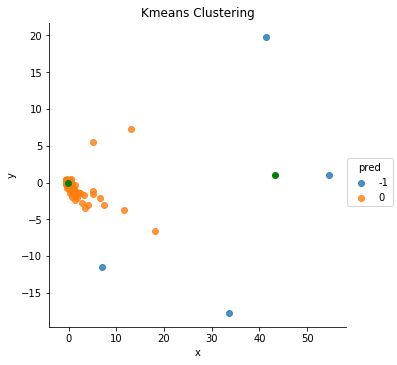

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2, copy=True)
x_2d = pca.fit_transform(x)
x_2d_df = pd.DataFrame(x_2d)
x_2d_df.columns = ["x","y"]
x_2d_df["pred"] = pred

print("PCA explains variance :", pca.explained_variance_ratio_)
print("Total variance :", np.sum(pca.explained_variance_ratio_))

centroids = kmeans.cluster_centers_
centroids_2d = pca.transform(centroids)
print(pca.components_)
# print(centroids_2d)
c_x = centroids_2d[:,0]
c_y= centroids_2d[:,1]
sns.lmplot("x", "y", hue="pred", data=x_2d_df, fit_reg=False)
plt.scatter(c_x, c_y, color='green')
plt.title("Kmeans Clustering")

## Trying DBSCAN 

Cluster users based on dbscan to see if outliers are different from other users

In [13]:
dbscan = DBSCAN(eps=15,min_samples=10)
pred = dbscan.fit_predict(x)
influencers = np.where(pred==-1)[0]
influencers

array([ 87, 197, 311, 489])

In [14]:
print("outliers.. potential influencers")
users.iloc[influencers,:].head()

outliers.. potential influencers


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
87,7764,123,139,113,272,3.49,36,23,7,4,14,137,219,97,97,67,78
197,1187,19819,19186,19161,344,4.09,2034,147,117,54,46,1067,2973,2777,2777,1151,1283
311,1692,2211,800,1899,392,3.90,1645,166,95,139,35,471,903,1533,1533,605,406
489,339,28869,13523,22103,112,4.20,918,81,89,18,28,671,10179,3004,3004,470,305


In [33]:
print("3 random majority users")
rands = np.random.randint(0, users.shape[0], 5)
users.mean()
# users.iloc[rands,:].head()

3 random majority users


review_count          156.955095
useful                190.528497
funny                 143.854922
cool                  140.298791
fans                   11.253886
average_stars           3.873074
compliment_hot         16.101900
compliment_more         1.996546
compliment_profile      1.195164
compliment_cute         0.894646
compliment_list         0.357513
compliment_note        10.661485
compliment_plain       36.808290
compliment_cool        25.552677
compliment_funny       25.552677
compliment_writer       9.747841
compliment_photos       7.747841
dtype: float64

## Visualizing DBSCAN results

Visualizing DBSCAN reslts to see if it helps

PCA explains variance : [0.70075076 0.11188837]
Total variance : 0.8126391290781653


Text(0.5,1,'DBSCAN Clustering')

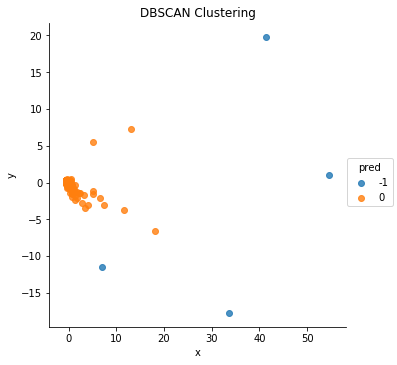

In [16]:
pca = PCA(n_components= 2, copy=True)
x_2d = pca.fit_transform(x)
x_2d_df = pd.DataFrame(x_2d)
x_2d_df.columns = ["x","y"]
x_2d_df["pred"] = pred

print("PCA explains variance :", pca.explained_variance_ratio_)
print("Total variance :", np.sum(pca.explained_variance_ratio_))
sns.lmplot("x", "y", hue="pred", data=x_2d_df, fit_reg=False)
plt.title("DBSCAN Clustering")

We observe that increasing the size of the neighbourhood, we get the same results as that of Kmeans with min_samples=10. 

We can clearly see that these outlier points are fat away from the rest of the users, and thus they may potentially be influencers, since these users have a lot more numberoif stars, cool points, useful reviews etc.

(The average stars given by users are similar for all users and thus this doesn't affect the clustering that much.)

In [17]:
influ = list(mon_users.iloc[influencers, :]['id'])

In [18]:
#reviews

In [19]:
reviews[(reviews['month'].isin([8,9,10])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5
2,13,13,13,13,13,13,13,13,13,13
3,22,22,22,22,22,22,22,22,22,22
4,43,43,43,43,43,43,43,43,43,43
5,64,64,64,64,64,64,64,64,64,64


In [20]:
reviews[(reviews['month'].isin([6,7])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6
4,34,34,34,34,34,34,34,34,34,34
5,58,58,58,58,58,58,58,58,58,58


We can see that even across the months where the ratings go down, the number of users who give a high rating is higher. But the overall falling trend in those months implies that the users who give lower rating affect the trend and may be influencers.
This data should be used along with the clustering results to see which users that are influencers